In [11]:
import os

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

from captum.insights import AttributionVisualizer, Batch
from captum.insights.attr_vis.features import ImageFeature
from model import TrainableModel
from config import load_config
import pytorch_lightning as pl

from datasets.fairface import FairFaceDataModule

In [19]:
config_path = r"temp_eval_config.json"

PATH = "F:\\Lab\\nfs\\nsl\\training-run\\lightning_logs\\version_104\\checkpoints\\epoch=58-val_std=2.0966.ckpt"

YAML_PATH = PATH.replace("checkpoints\\epoch=58-val_std=2.0966.ckpt", "hparams.yaml")
print(YAML_PATH)
import yaml
import json
s = json.dumps(dict(yaml.load(open(YAML_PATH), Loader=yaml.Loader))['config'], default=lambda o: o.__dict__, sort_keys=True, indent=4)

with open('temp_eval_config.json', 'w') as f:
    f.write(s)

data = FairFaceDataModule(load_config(config_path), filter_by="all")
config=load_config(config_path)
model = TrainableModel.load_from_checkpoint(PATH, config=config)

test_loader = data.test_dataloader

def formatted_data_iter():
    while True:
        images, labels = next(test_loader)
        yield Batch(inputs=images, labels=labels)

F:\Lab\nfs\nsl\training-run\lightning_logs\version_104\hparams.yaml


In [20]:
def get_classes():
    classes = [
        "Female",
        "Male"
    ]
    return classes
def baseline_func(input):
    return input * 0
normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
visualizer = AttributionVisualizer(
    models=[model],
    score_func=lambda o: torch.nn.functional.softmax(o, 1),
    classes=get_classes(),
    features=[
        ImageFeature(
            "Photo",
            baseline_transforms=[baseline_func],
            input_transforms=[normalize],
        )
    ],
    dataset=formatted_data_iter(),
)

In [22]:
visualizer.render()

In [ ]:
# show a screenshot if using notebook non-interactively
from IPython.display import Image
Image(filename='img/captum_insights.png')

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
data =[np.random.uniform(low=0.85, high=0.99, size=(14,)) for _ in range(4)]
data = []

import pandas as pd

data = pd.DataFrame(data)
print(data)
sns.violinplot(y=data)



         0         1         2         3         4         5         6   \
0  0.981648  0.960352  0.869998  0.909950  0.937608  0.977580  0.976633   
1  0.897815  0.864513  0.953236  0.941694  0.870224  0.855482  0.858032   
2  0.937542  0.986422  0.962769  0.955231  0.902224  0.918635  0.889775   
3  0.907174  0.870896  0.852038  0.970328  0.875887  0.921214  0.969025   

         7         8         9         10        11        12        13  
0  0.897734  0.865637  0.876528  0.895510  0.862414  0.930614  0.931811  
1  0.878139  0.876889  0.940162  0.925460  0.986329  0.915870  0.967565  
2  0.956343  0.936785  0.898610  0.983922  0.878220  0.907802  0.896033  
3  0.950253  0.902449  0.898171  0.908312  0.953089  0.931487  0.944338  


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

[0.80778971 0.1464362  0.86666292 0.28390659 0.6709734  0.66686516
 0.12778213 0.11296272 0.56797223 0.43078957 0.50120138 0.01272906
 0.80042412 0.78787159]


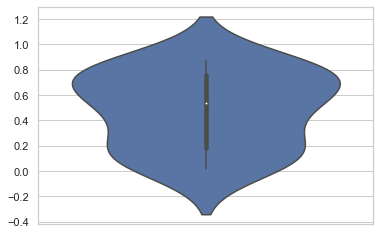